
# Strongly Connected Components Space Complexity Analysis


## Advanced Algorithms and Parallel Programming Project

### Semsi Yigit Ozgumus

#### Supervised by: Fabrizio Ferrandi

## Outline 

* Introduction of the Problem

* Implementation of Algorithms

* Analysis of Results

## Introduction of the Problem

## Implementation of Algorithms

## Analysis of Results

* Importing the required libraries and implementing the utility functions

* Extraction of the Experiment results

* Data Preprocessing

* Visualization of the Algorithm performances in terms of amount of storage used

### Import Required Libraries 

In [13]:
import pandas as pd
import numpy as np
import sklearn as sk
import scipy as sp
import bokeh as bkh
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join

# All outputs are visible
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
#Retina resolution for the plots
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
# All plots contained in the notebook
%matplotlib inline

# visualization library
import seaborn as sns
sns.set( color_codes=True)
sns.set_context(rc={"font.family":'sans',"font.size":24,"axes.titlesize":24,"axes.labelsize":24}) 




## Implementation of code to select the experiment file and visualization of graphs

In [14]:
def print_available_cvs():
    data = "../data"
    experiment_csvs = [("data/" + f) for f in listdir(data) if (isfile(join(data, f)) and f[-3:] == 'csv')]
    print("The current experiment list is:")
    for f in range(len(experiment_csvs)):
        print(str(f) + "-) " + experiment_csvs[f] )
        
def get_data(index):
    data = "../data"
    experiment_csvs = [("data/" + f) for f in listdir(data) if (isfile(join(data, f)) and f[-3:] == 'csv')]
    names = ["id","Vertex","Edge",
         'T-Tarjan','S-Tarjan',
         'T-Nuutila Original','S-Nuutila Original', 
         'T-Nuutila Version1','S-Nuutila Version1',
         'T-Nuutila Version2','S-Nuutila Version2', 
         'T-Pearson Version1','S-Pearson Version1',
         'T-Pearson Version2','S-Pearson Version2',
         'T-Pearson Version3','S-Pearson Version3']
    file = "../"+ experiment_csvs[index]
    print("\n The file that is used to create the dataframe is : " + file)
    df = pd.read_csv(file,sep=',',names=names)
    return df

def seperate_dataframes(df,maxIndex):
    df_storage_all = df[['Vertex','S-Tarjan',
                 'S-Nuutila Original', 
                 'S-Nuutila Version1',
                 'S-Nuutila Version2', 
                 'S-Pearson Version1',
                 'S-Pearson Version2',
                'S-Pearson Version3']]
    df_storage_all = df_storage_all.sort_values(by=['Vertex']);
    
    df_edges = df[['Vertex','Edge']].sort_values(by=['Vertex'])
    
    df_s_t = df_storage_all[['Vertex','S-Tarjan']]
    df_s_n = df_storage_all[['Vertex',
                                     'S-Nuutila Original', 
                                     'S-Nuutila Version1',
                                     'S-Nuutila Version2', ]]
    df_s_p = df_storage_all[['Vertex',
                                   'S-Pearson Version1',
                                    'S-Pearson Version2',
                                    'S-Pearson Version3']]
    bundle = [df_edges[:maxIndex],df_s_n[:maxIndex],df_s_p[:maxIndex],df_storage_all[:maxIndex]]
    return bundle

def plot_storage(df,axe,title):
   # plt.figure(figsize = (10,8))
    for i in range(1,len(df.columns)):
        axe.plot(df['Vertex'],df[df.columns[i]])
    if("Edge" in df.columns):
        axe.set_ylabel('Edge Count')
    else:
        axe.set_ylabel('Kilobytes')
    axe.legend(loc='best')  
    axe.set_xlabel('Vertex Count')
    axe.set_title(title)
    
    
def plot_comparisons(bundle):
    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(16,16))
    titles = ["Edge Count With Respect to Vertices",
             "Storage Performance of Nuutila Implementations",
             "Storage Performance of Pearce Implementations",
             "Storage Performance of All Algorithms"]
    axs = [ax1,ax2,ax3, ax4]
    for i in range(len(bundle)):
        plot_storage(bundle[i],axs[i],titles[i])
        

## Print the current experiments

In [15]:
print_available_cvs()

The current experiment list is:
0-) data/experiment_2018-07-13.00:45:04.csv
1-) data/experiment_2018-07-12.19:35:55.csv
2-) data/experiment_2018-07-12.14:34:02.csv
3-) data/experiment_2018-07-10.22:19:31.csv
4-) data/experiment_2018-07-13.00:56:40.csv
5-) data/experiment_2018-07-12.17:52:58.csv
6-) data/experiment_2018-07-11.21:06:31.csv
7-) data/experiment_2018-07-14.11:02:43.csv
8-) data/experiment_2018-07-12.19:27:31.csv
9-) data/experiment_2018-07-12.19:09:53.csv
10-) data/experiment_2018-06-28.11:09:41.csv
11-) data/experiment_2018-06-28.21:30:23.csv
12-) data/experiment_2018-07-14.11:04:14.csv
13-) data/experiment_2018-06-29.09:26:39.csv
14-) data/experiment_2018-07-12.14:28:42.csv
15-) data/experiment_2018-07-03.08:34:40.csv
16-) data/experiment_2018-07-13.00:38:25.csv
17-) data/experiment_2018-07-01.12:42:11.csv


## Select the latest one

In [20]:
df = get_data(12)


 The file that is used to create the dataframe is : ../data/experiment_2018-07-14.11:04:14.csv


## Let's See the general statistics about the experiment

In [21]:
df.shape
df.describe()

(27993, 17)

,id,Vertex,Edge,T-Tarjan,S-Tarjan,T-Nuutila Original,S-Nuutila Original,T-Nuutila Version1,S-Nuutila Version1,T-Nuutila Version2,S-Nuutila Version2,T-Pearson Version1,S-Pearson Version1,T-Pearson Version2,S-Pearson Version2,T-Pearson Version3,S-Pearson Version3
count,27993.000000,27993.000000,27993.000000,27993.000000,27993.000000,27993.000000,27993.000000,27993.000000,27993.000000,27993.000000,27993.000000,27993.000000,27993.000000,27993.000000,27993.000000,27993.000000,27993.000000
mean,13996.000000,56.043332,4891.667667,204.185988,1.094596,0.632776,1.751354,0.724099,1.715383,0.645709,1.335283,0.689891,1.715383,0.495219,0.624693,2.284461,2.153221
std,8081.027379,92.942570,20413.207541,983.850475,1.815285,2.632352,2.904455,3.545011,2.905585,2.788186,2.178863,3.588385,2.905585,2.568326,1.092758,10.513601,3.631406
min,0.000000,5.000000,0.000000,0.007571,0.097656,0.002458,0.156250,0.001851,0.117188,0.001818,0.136719,0.001999,0.117188,0.001380,0.023438,0.003013,0.156250
25%,6998.000000,17.000000,48.000000,0.165253,0.332031,0.019847,0.531250,0.019117,0.492188,0.016903,0.417969,0.019992,0.492188,0.014637,0.148438,0.048444,0.617188
50%,13996.000000,30.000000,219.000000,1.136430,0.585938,0.049318,0.937500,0.051541,0.898438,0.045029,0.722656,0.052066,0.898438,0.037817,0.312500,0.144048,1.125000
75%,20994.000000,42.000000,774.000000,4.717180,0.820312,0.130460,1.312500,0.139844,1.273440,0.124474,1.003910,0.138231,1.273440,0.098451,0.476562,0.422646,1.593750
max,27992.000000,499.000000,242105.000000,26616.900000,9.746090,87.062600,15.593800,308.674000,15.585900,137.015000,11.902300,381.703000,15.585900,267.103000,5.843750,627.877000,19.484400


## Plot the Storage Trends with respect to the each implemented algorithm, with the number of edges to explain the shape of the graph

### First 5000 Graphs

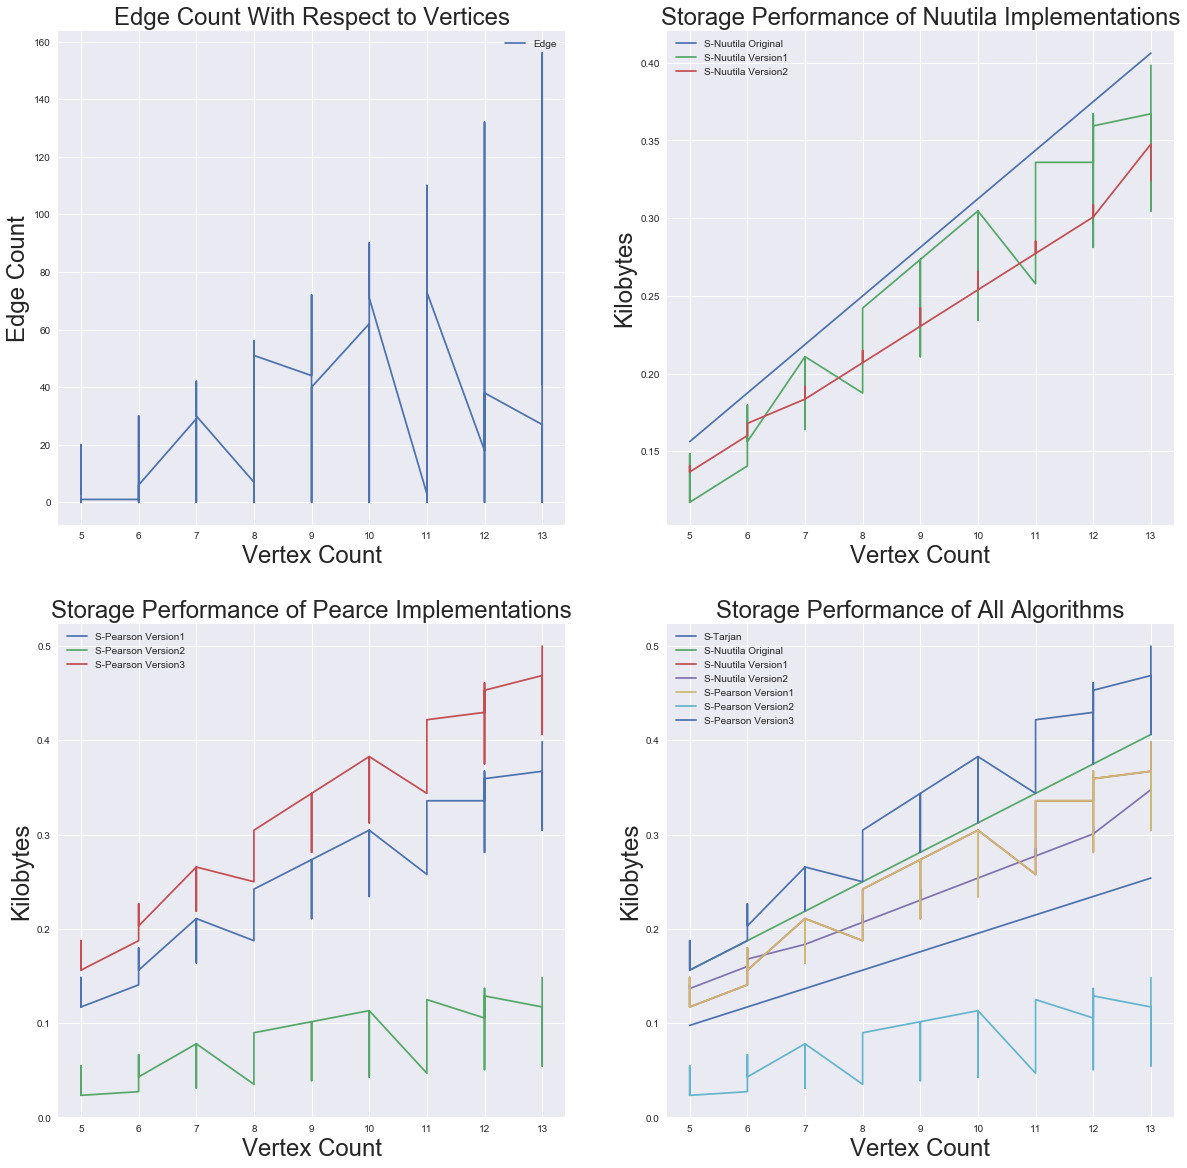

In [6]:
new_df_5000 = seperate_dataframes(df,5000)
plot_comparisons(new_df_5000)

### First 10000 Graphs

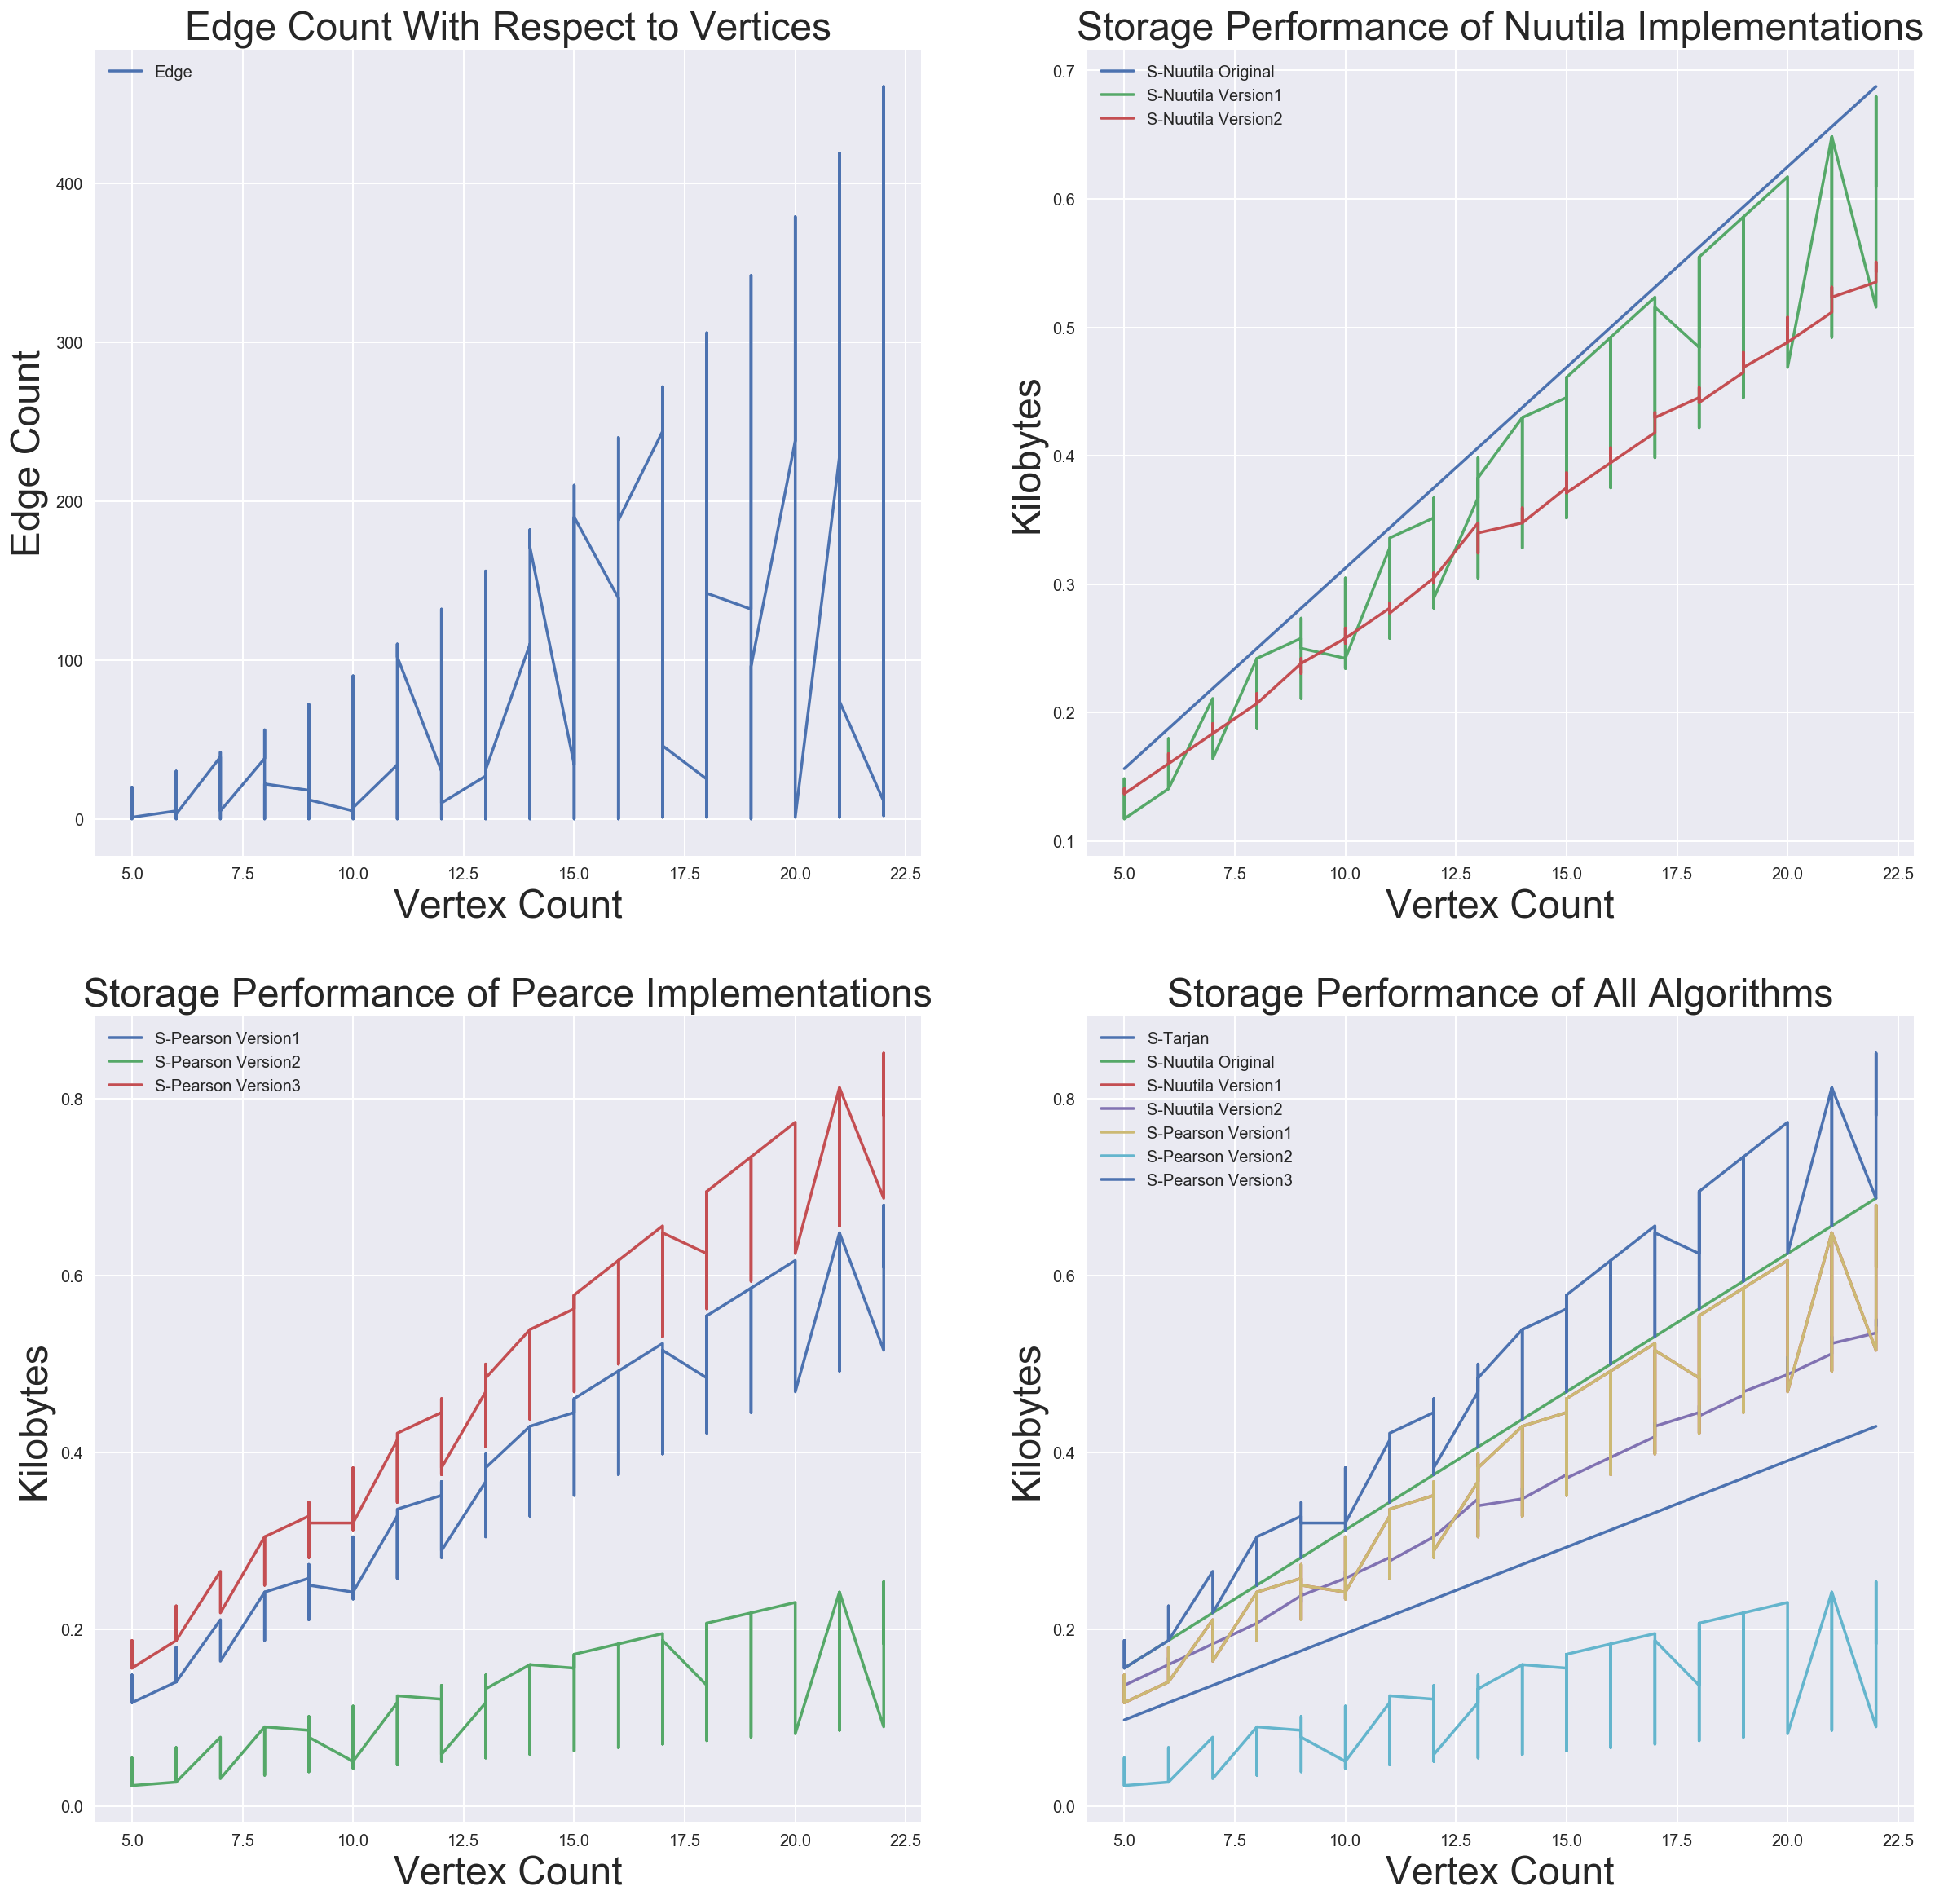

In [118]:
new_df_10000 = seperate_dataframes(df,10000)
plot_comparisons(new_df_10000)

### First 15000 Graphs

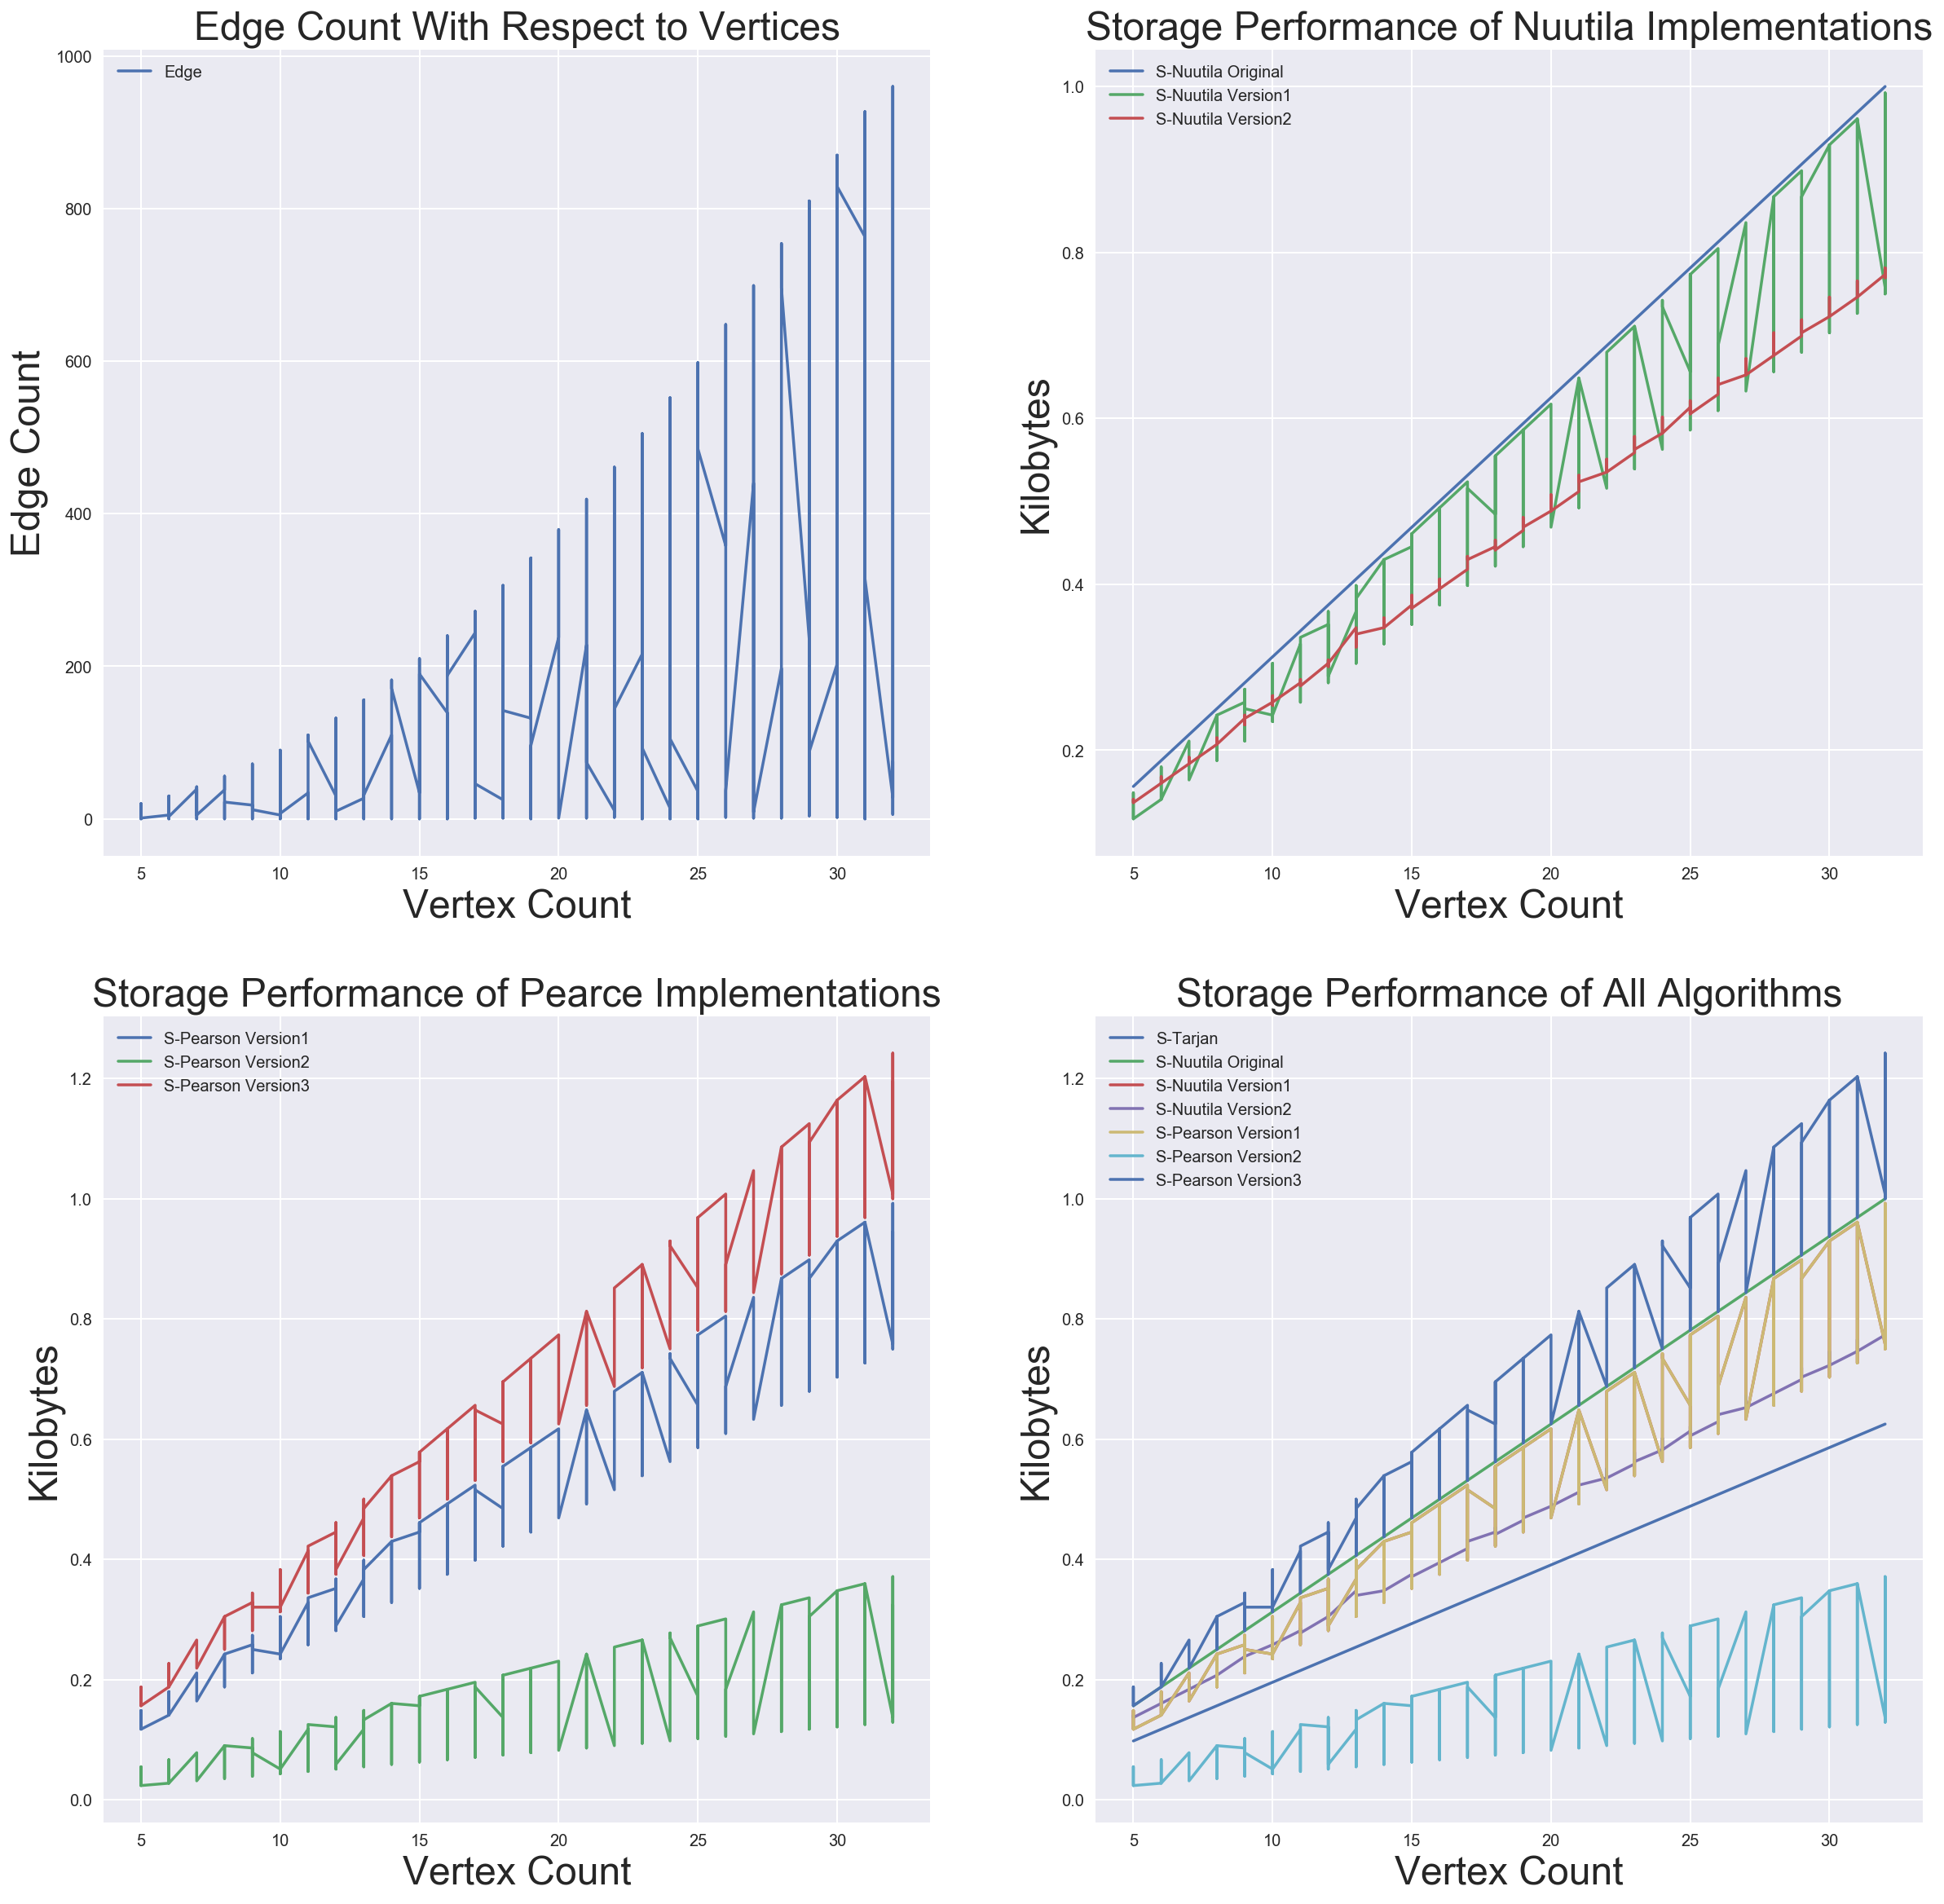

In [120]:
new_df_15000 = seperate_dataframes(df,15000)
plot_comparisons(new_df_15000)

### First 25000 Graphs

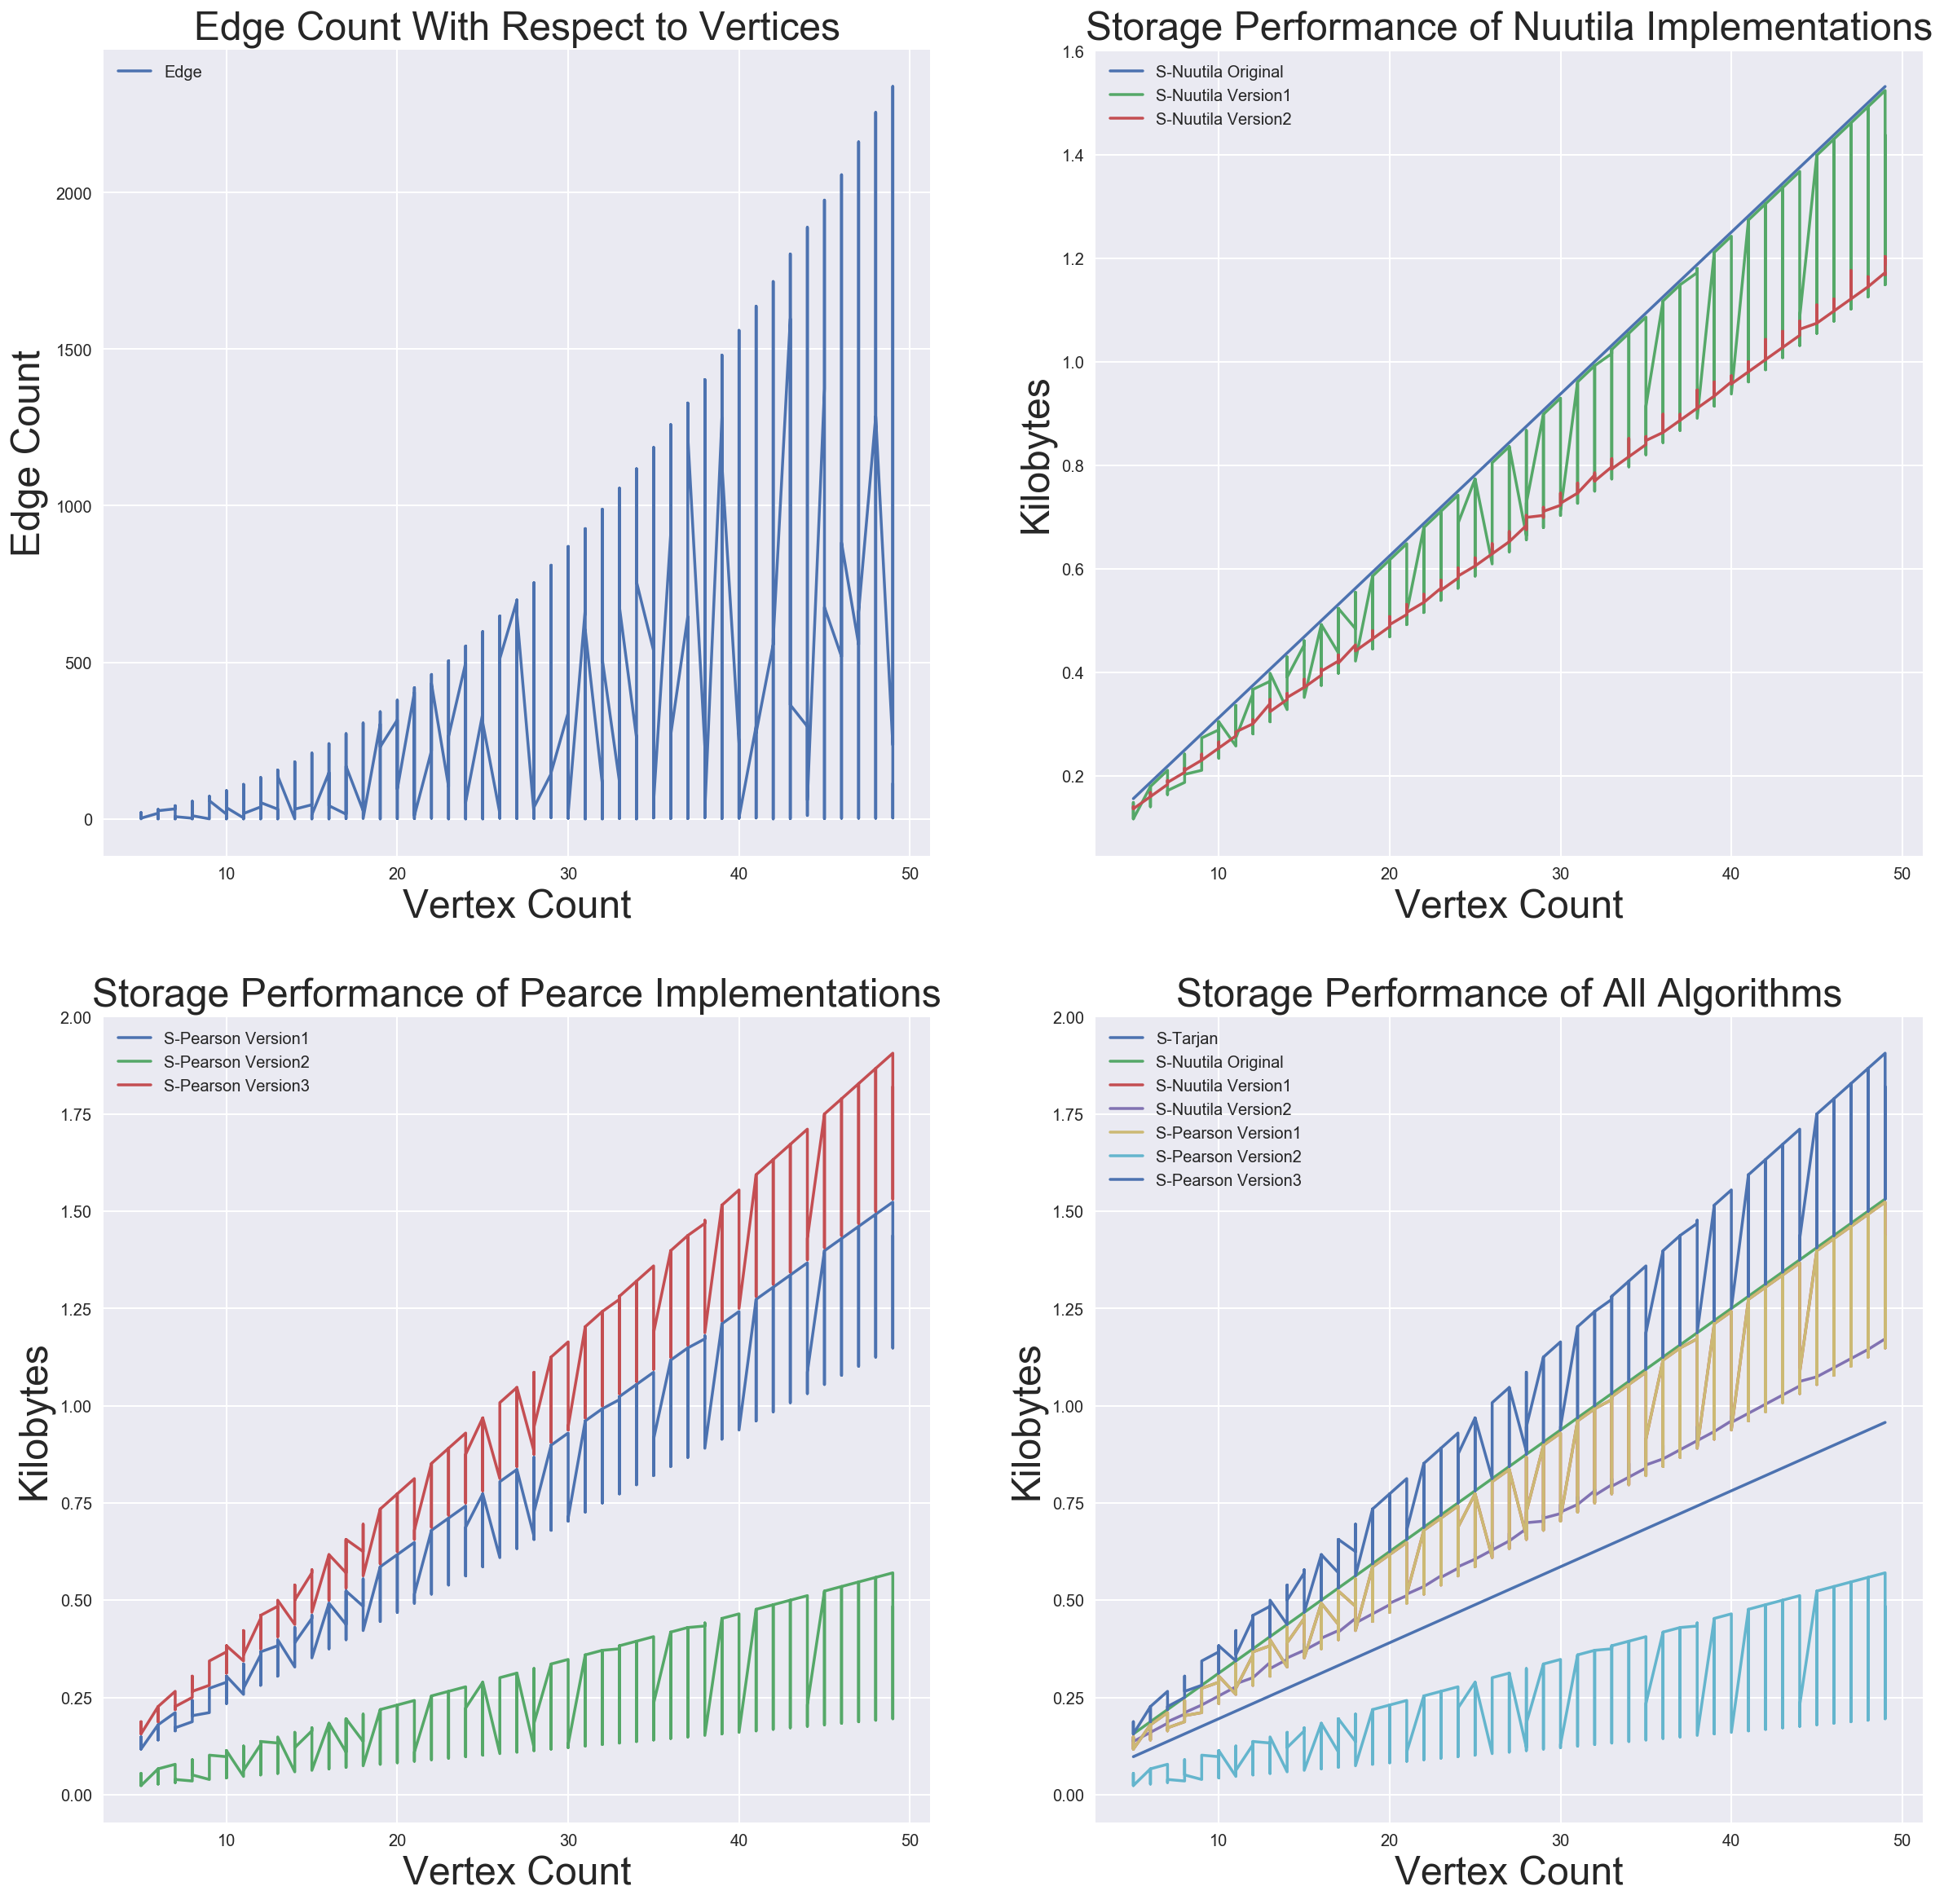

In [12]:
new_df_25000 = seperate_dataframes(df,25000)
plot_comparisons(new_df_25000)

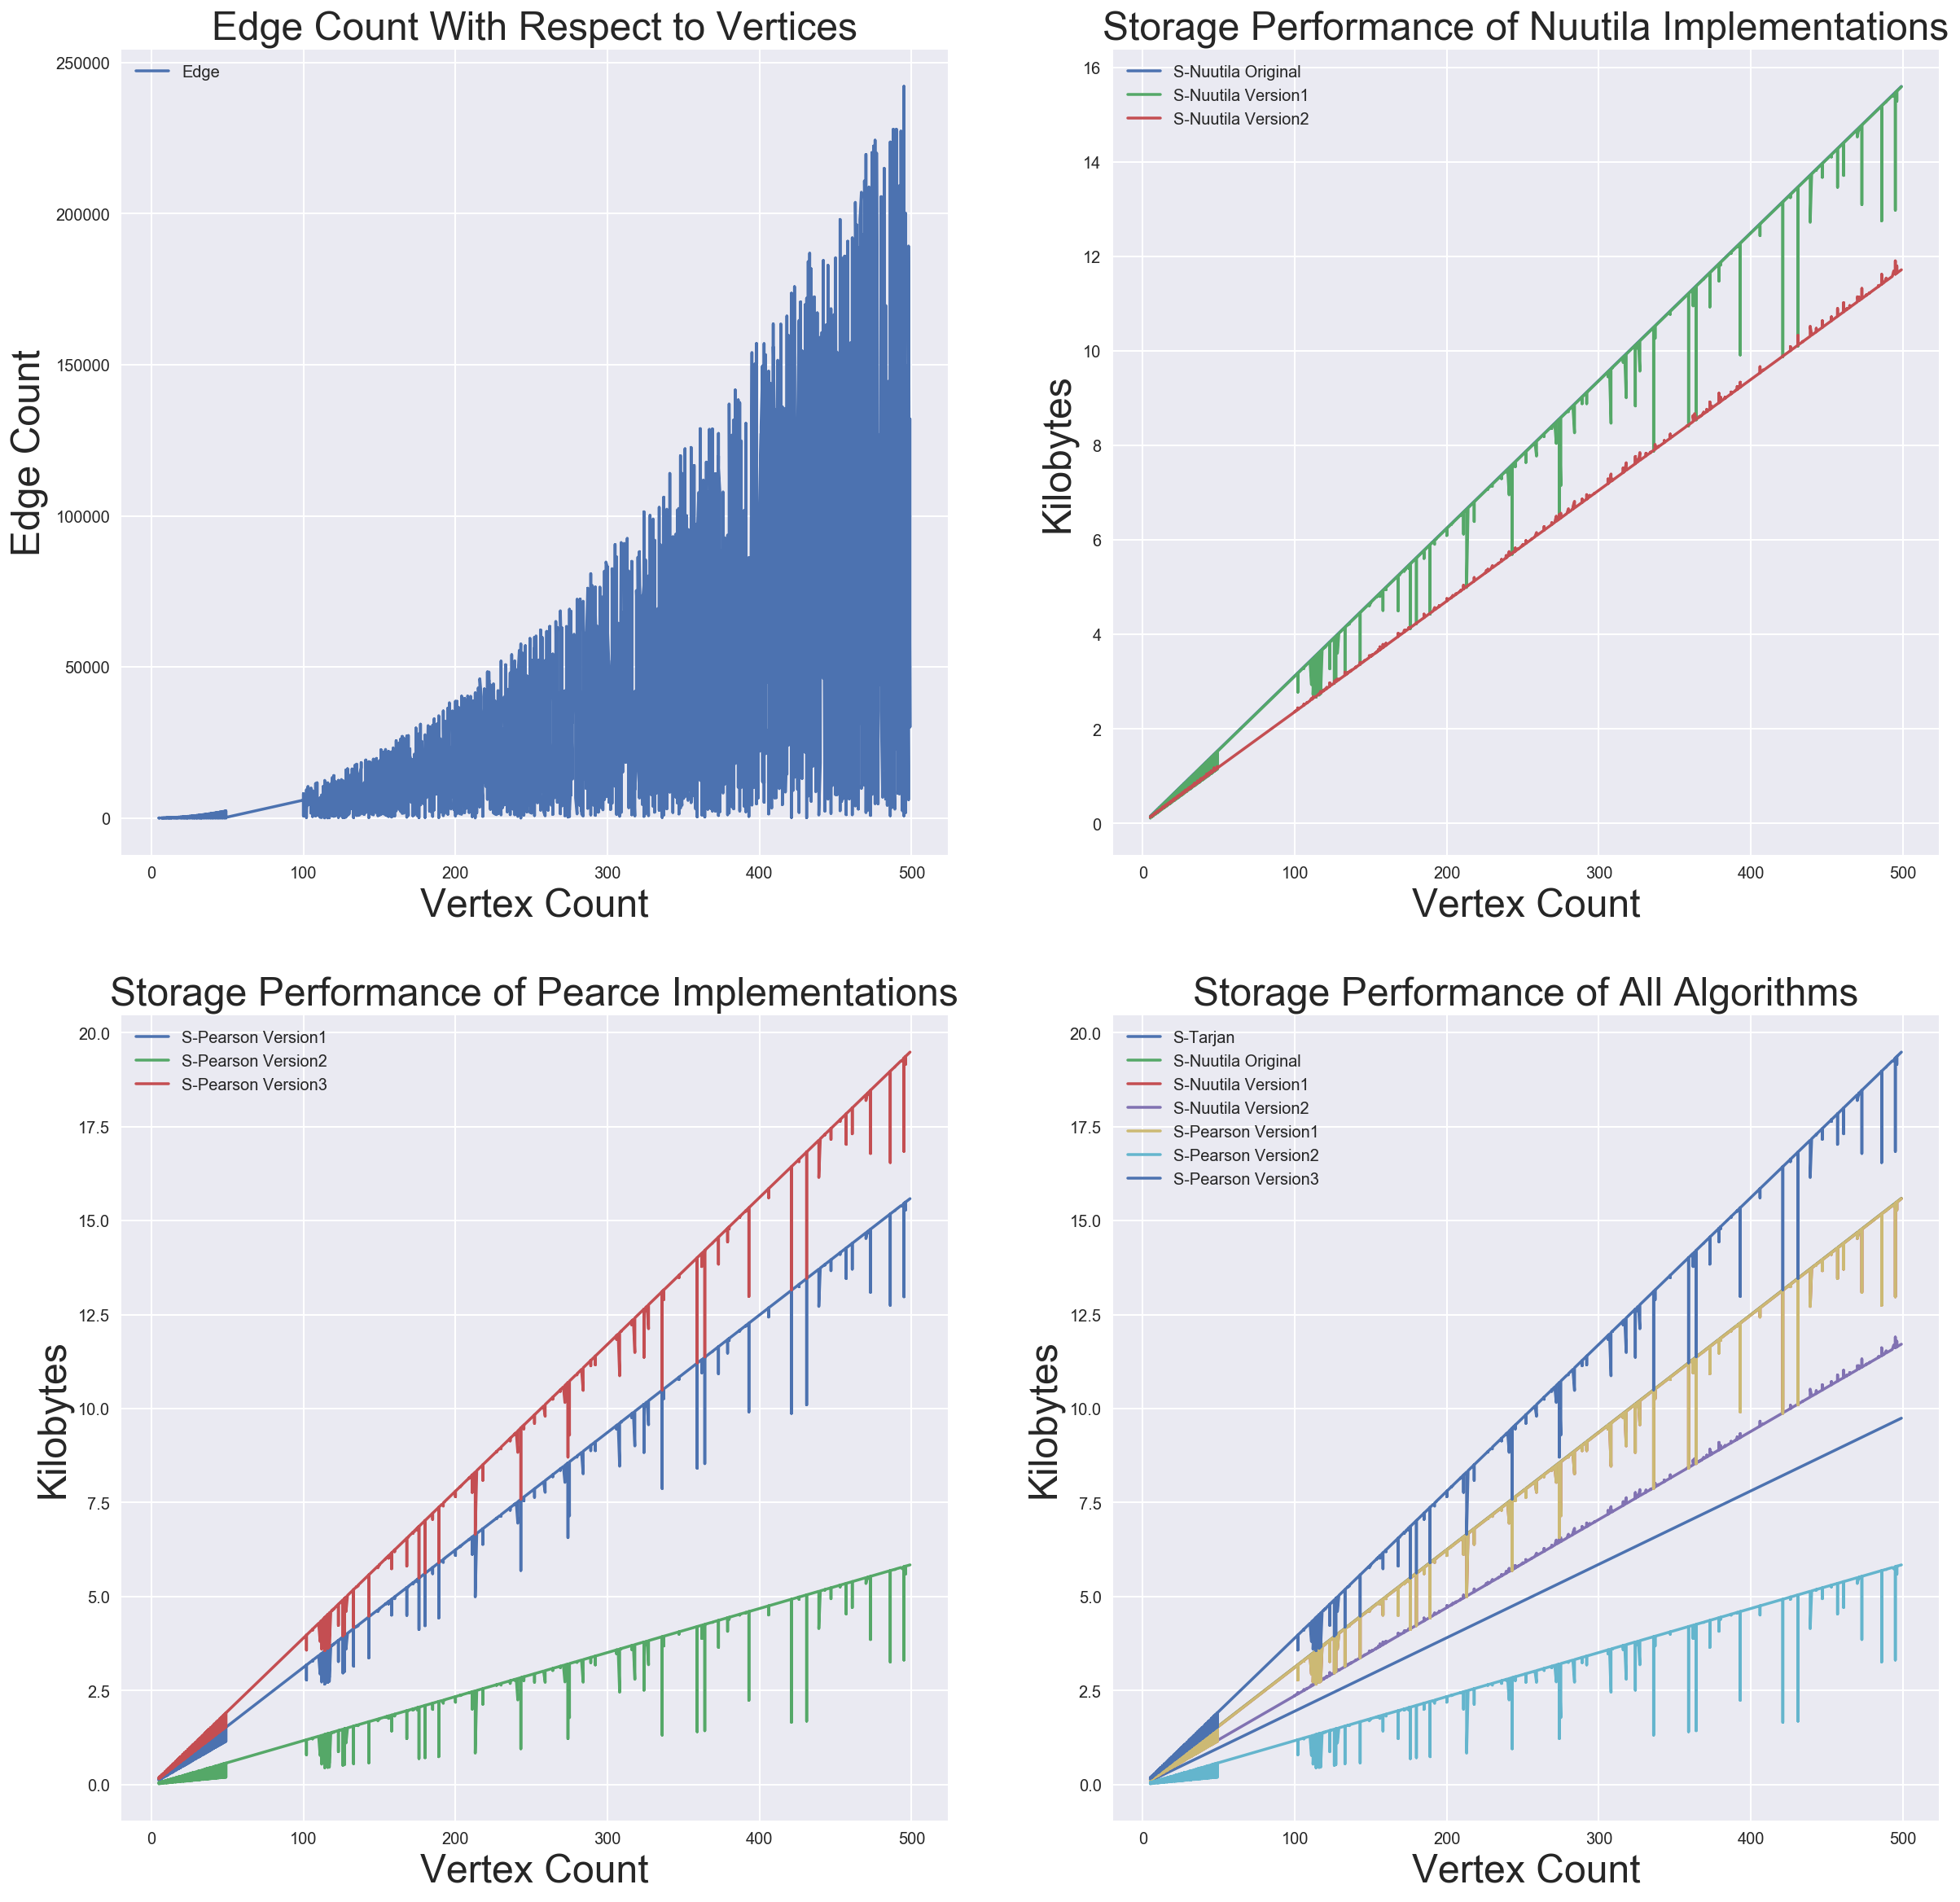

In [18]:
new_dfs = seperate_dataframes(df,df.shape[0])
plot_comparisons(new_dfs)